[Cook County Assessors Office Code](https://gitlab.com/ccao-data-science---modeling)

Data Sources:

* [Cook County GIS Open Data](https://hub-cookcountyil.opendata.arcgis.com/)

In [1]:
import csv, json
from IPython.display import IFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sn

In [2]:
chicago_sales = pd.read_csv("./data/Cook_County_Assessors_Residential_Sales_Data_2020.csv")
print("Data frame has {} rows and {} columns".format(len(chicago_sales), len(chicago_sales.columns)))
chicago_sales.describe()

Data frame has 583370 rows and 83 columns


,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Age Decade Squared,Lot Size Squared,Improvement Size Squared,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Square root of lot size,Square root of age,Square root of improvement size,Town and Neighborhood
count,5.833700e+05,583370.000000,583370.000000,5.833700e+05,583370.000000,410156.000000,410157.000000,410156.000000,410156.000000,410156.000000,...,583370.000000,5.833700e+05,4.101570e+05,583370.000000,410157.000000,583370.000000,583370.000000,583370.000000,410157.000000,583370.000000
mean,1.594551e+13,242.962891,100.447214,5.681932e+04,49.699388,2.119150,0.442684,1.932484,1.180592,7.174855,...,48.998287,5.901535e+10,4.508064e+06,0.818067,0.824618,100.447214,139.361005,7.442808,41.399761,22596.957662
std,7.447628e+12,43.717294,97.291263,2.361927e+05,24.130051,1.273729,1.098950,0.771985,0.631256,3.518249,...,46.218085,5.447767e+11,8.065406e+06,0.385789,0.380294,97.291263,193.385351,2.401553,10.713765,27610.065511
min,1.011000e+12,202.000000,10.000000,0.000000e+00,10.000000,1.000000,-5.000000,1.000000,1.000000,2.000000,...,0.010000,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,1011.000000
25%,1.201105e+13,203.000000,31.000000,3.780000e+03,27.000000,1.000000,0.000000,1.000000,1.000000,5.000000,...,13.690000,1.428840e+07,1.272384e+06,1.000000,1.000000,31.000000,61.481705,6.082763,33.585711,3160.000000
50%,1.528307e+13,211.000000,71.000000,6.550000e+03,70.000000,2.000000,0.000000,2.000000,1.000000,6.000000,...,33.640000,4.290250e+07,2.202256e+06,1.000000,1.000000,71.000000,80.932070,7.615773,38.522721,7381.000000
75%,2.017303e+13,299.000000,130.000000,1.290000e+04,72.000000,2.000000,0.000000,2.000000,1.000000,8.000000,...,81.000000,1.664100e+08,4.866436e+06,1.000000,1.000000,130.000000,113.578167,9.486833,46.968074,35112.000000
max,3.332302e+13,299.000000,600.000000,3.713027e+06,77.000000,8.000000,6.000000,4.000000,6.000000,241.000000,...,396.010000,1.378657e+13,5.716403e+08,1.000000,1.000000,600.000000,1926.921638,14.106736,154.625354,77170.000000


In [3]:
# Data from: https://datacatalog.cookcountyil.gov/Property-Taxation/Cook-County-Assessor-s-Residential-Sales-Data/5pge-nu6u
chicago_sales = pd.read_csv("./data/Cook_County_Assessors_Residential_Sales_Data_2020.csv")
chicago_sales = chicago_sales[chicago_sales["Pure Market Filter"] == 1]
chicago_sales = chicago_sales[chicago_sales["Sale Price"] > 0]
drop_if_no_data = [
    'Age',
    'Age Decade',
    'Age Decade Squared', 
    'Age Squared',
    'Apartments',
    'Attic Finish', 
    'Attic Type', 
    'Basement', 
    'Basement Finish',
    'Bedrooms',  
    'Building Square Feet', 
    'Cathedral Ceiling',
    'Census Tract', 
    'Central Air',
    'Central Heating',
    'Deed No.',
    'Design Plan',
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Floodplain',
    'Full Baths',
    'Garage 1 Area',
    'Garage 1 Attachment',
    'Garage 1 Material',
    'Garage 1 Size', 
    'Garage 2 Area', 
    'Garage 2 Attachment', 
    'Garage 2 Material',
    'Garage 2 Size', 
    'Garage Indicator',
    'Half Baths', 
    'Land Square Feet',
    'Latitude', 
    'Longitude',
    'Lot Size Squared',
    'Multi Property Indicator',
    'Neighborhood Code',
    "O'Hare Noise",
    'PIN',
    'Porch',
    'Property Class',
    'Pure Market Filter',
    'Road Proximity',
    'Roof Material',
    'Rooms',
    'Sale Date',
    'Sale Half of Year',
    'Sale Half-Year',
    'Sale Price',
    'Sale Quarter',
    'Sale Quarter of Year',
    'Sale Year',
    'Site Desirability',
    'Square root of lot size',
    'Town Code',
    'Town and Neighborhood',
    'Type of Residence',
    'Use',
    'Wall Material'
]
chicago_sales = chicago_sales.dropna(subset=drop_if_no_data, axis=0)

print("Data frame has {} rows and {} columns".format(len(chicago_sales), len(chicago_sales.columns)))
left = set(list(chicago_sales.columns))-set(drop_if_no_data)
left = list(left)
left.sort()
print(left)
chicago_sales.head()

Data frame has 326484 rows and 83 columns
['Condition, Desirability and Utility', 'Condo Class Factor', 'Condo Strata', 'Construction Quality', 'Improvement Size Squared', 'Large Lot', 'Modeling Group', 'Most Recent Sale', 'Multi Code', 'Multi-Family Indicator', 'Neigborhood Code (mapping)', 'Number of Commercial Units', 'Number of Units', 'Other Heating', 'Other Improvements', 'Percent Ownership', 'Property Address', 'Renovation', 'Repair Condition', 'Sale Month of Year', 'Square root of age', 'Square root of improvement size', 'Total Building Square Feet']


,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Age Decade Squared,Lot Size Squared,Improvement Size Squared,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Square root of lot size,Square root of age,Square root of improvement size,Town and Neighborhood
2,16094150130000,211,13,4500.0,77,3.0,6.0,2.0,2.0,24.0,...,75.69,2.025000e+07,55279225.0,1,1.0,13,67.082039,9.327379,86.226446,7713
5,4252000820000,204,100,33898.0,25,5.0,0.0,2.0,4.0,11.0,...,37.21,1.149074e+09,22014864.0,1,1.0,100,184.114095,7.810250,68.498175,25100
8,14322110150000,208,12,3720.0,74,3.0,0.0,2.0,6.0,9.0,...,0.16,1.383840e+07,18378369.0,1,1.0,12,60.991803,2.000000,65.475186,7412
9,27021200080000,204,34,16079.0,28,1.0,0.0,3.0,1.0,7.0,...,8.41,2.585342e+08,4875264.0,1,1.0,34,126.802997,5.385165,46.989360,2834
11,13121080620000,204,42,7560.0,71,1.0,0.0,2.0,1.0,6.0,...,38.44,5.715360e+07,6441444.0,1,1.0,42,86.948260,7.874008,50.378567,7142


In [4]:
cols_to_drop = [
    'Condition, Desirability and Utility', 
    'Condo Class Factor', 
    'Condo Strata', 
    'Construction Quality', 
    'Improvement Size Squared', 
    'Large Lot', 
    'Modeling Group', 
    'Most Recent Sale', 
    'Multi Code', 
    'Multi-Family Indicator', 
    'Neigborhood Code (mapping)', 
    'Number of Commercial Units', 
    'Number of Units', 
    'Other Heating', 
    'Other Improvements', 
    'Percent Ownership', 
    'Property Address', 
    'Renovation', 
    'Repair Condition', 
    'Sale Month of Year', 
    'Square root of age', 
    'Square root of improvement size',
    'Total Building Square Feet',
]
chicago_sales = chicago_sales.drop(cols_to_drop, axis = 1)

In [5]:
import folium
chicago_sales["Census Tract"] = chicago_sales["Census Tract"].astype(int)
tract_counts = chicago_sales["Census Tract"].value_counts()
tract_counts = tract_counts.to_frame()
tract_counts["count"] = tract_counts["Census Tract"]
tract_counts["Census Tract"] = tract_counts.index.astype(str)

m = folium.Map(zoom_start=10, location=[41.88, -87.6])
geo_path = "./data/geodata/Illinois_CensusTract.geojson"

folium.Choropleth(
 geo_data=geo_path,
 data=tract_counts,
 columns=['Census Tract', "count"],
 key_on='feature.properties.TRACTCE',
 nan_fill_color='grey',
 nan_fill_opacity=0.1,
 fill_color='BuPu',
 fill_opacity=0.85,
 line_opacity=0.5,
 legend_name="Housing Sales per Census Tract"
).add_to(m)
m.save('./maps/ChicagoSales.html')

from IPython.display import IFrame

IFrame(src='./maps/ChicagoSales.html', width=900, height=1000)

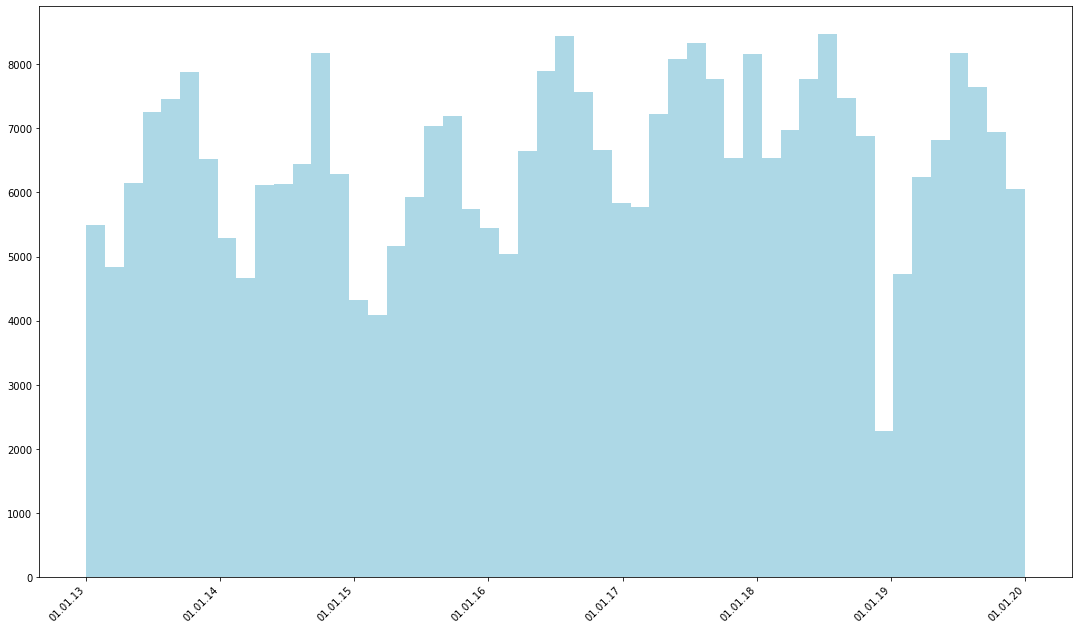

In [6]:
chicago_sales['Sale Date'] = pd.to_datetime(chicago_sales['Sale Date'], format='%m/%d/%Y')
chicago_sales["Sale Date"] = chicago_sales["Sale Date"].astype("datetime64")

fig, ax = plt.subplots(1,1)
ax.hist(chicago_sales["Sale Date"], bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.xticks(rotation=45, ha="right")
fig.set_size_inches(18.5, 10.5)
plt.show()

In [7]:
# Categorical --> Boolean (excluding already boolean)
print(sorted(list(chicago_sales.columns)))
categorical = [
    "Attic Finish",
    "Attic Type",
    "Basement",
    "Basement Finish",
    "Cathedral Ceiling",
    #"Census Tract",
    "Central Heating",
    "Design Plan",
    "Fireplaces",
    'Garage 1 Material',
    'Garage 2 Material',
    #"Neighborhood Code",
    "Porch",
    "Property Class",
    "Roof Material",
    'Site Desirability',
    #"Town Code",
    #'Town and Neighborhood',
    "Type of Residence",
    "Wall Material",
]
for col in chicago_sales[categorical]:
    print(col, len(chicago_sales[col].unique()))
    for val in chicago_sales[col].unique():
        print("Bool-{}-{}".format(col, int(val)))
        chicago_sales["Bool-{}-{}".format(col, int(val))] = np.where(chicago_sales[col] == val, 1, 0)
chicago_sales.head()

['Age', 'Age Decade', 'Age Decade Squared', 'Age Squared', 'Apartments', 'Attic Finish', 'Attic Type', 'Basement', 'Basement Finish', 'Bedrooms', 'Building Square Feet', 'Cathedral Ceiling', 'Census Tract', 'Central Air', 'Central Heating', 'Deed No.', 'Design Plan', 'Estimate (Building)', 'Estimate (Land)', 'Fireplaces', 'Floodplain', 'Full Baths', 'Garage 1 Area', 'Garage 1 Attachment', 'Garage 1 Material', 'Garage 1 Size', 'Garage 2 Area', 'Garage 2 Attachment', 'Garage 2 Material', 'Garage 2 Size', 'Garage Indicator', 'Half Baths', 'Land Square Feet', 'Latitude', 'Longitude', 'Lot Size Squared', 'Multi Property Indicator', 'Neighborhood Code', "O'Hare Noise", 'PIN', 'Porch', 'Property Class', 'Pure Market Filter', 'Road Proximity', 'Roof Material', 'Rooms', 'Sale Date', 'Sale Half of Year', 'Sale Half-Year', 'Sale Price', 'Sale Quarter', 'Sale Quarter of Year', 'Sale Year', 'Site Desirability', 'Square root of lot size', 'Town Code', 'Town and Neighborhood', 'Type of Residence', 'U

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Bool-Type of Residence-1,Bool-Type of Residence-2,Bool-Type of Residence-4,Bool-Type of Residence-8,Bool-Type of Residence-7,Bool-Type of Residence-6,Bool-Wall Material-2,Bool-Wall Material-3,Bool-Wall Material-1,Bool-Wall Material-4
2,16094150130000,211,13,4500.0,77,3.0,6.0,2.0,2.0,24.0,...,0,0,0,0,0,0,1,0,0,0
5,4252000820000,204,100,33898.0,25,5.0,0.0,2.0,4.0,11.0,...,0,0,0,0,0,0,1,0,0,0
8,14322110150000,208,12,3720.0,74,3.0,0.0,2.0,6.0,9.0,...,0,0,0,0,0,0,1,0,0,0
9,27021200080000,204,34,16079.0,28,1.0,0.0,3.0,1.0,7.0,...,1,0,0,0,0,0,0,1,0,0
11,13121080620000,204,42,7560.0,71,1.0,0.0,2.0,1.0,6.0,...,1,0,0,0,0,0,1,0,0,0


In [8]:
cols_of_interest = [ 
    'Age',
    'Age Decade',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Latitude', 
    'Longitude',
    'Lot Size Squared',
    'Rooms',
    'Sale Price',
    ]
for col in cols_of_interest:
    chicago_sales[col] = chicago_sales[col].abs()
corr_df = chicago_sales[cols_of_interest]
corr_df.describe()

,Age,Age Decade,Bedrooms,Building Square Feet,Estimate (Building),Estimate (Land),Fireplaces,Full Baths,Garage 1 Area,Garage 2 Area,Half Baths,Land Square Feet,Latitude,Longitude,Lot Size Squared,Rooms,Sale Price
count,326484.000000,326484.000000,326484.000000,326484.000000,3.264840e+05,3.264840e+05,326484.000000,326484.000000,326484.000000,326484.000000,326484.000000,3.264840e+05,326484.000000,326484.000000,3.264840e+05,326484.000000,3.264840e+05
mean,65.801411,6.580141,3.536982,1802.523012,2.167108e+05,5.026152e+04,0.314873,1.684478,1.584393,0.006435,0.458243,7.005194e+03,41.854837,87.779903,2.126040e+08,7.066548,2.909260e+05
std,31.748073,3.174807,1.515674,1036.748828,1.954864e+05,5.389067e+04,0.542223,0.913362,0.753563,0.153946,0.564165,1.278795e+04,0.170450,0.145445,2.077391e+10,3.326263,3.086270e+05
min,1.000000,0.100000,1.000000,392.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,1.490000e+02,41.469868,87.524884,2.220100e+04,2.000000,1.000100e+04
25%,47.000000,4.700000,3.000000,1129.000000,1.092300e+05,2.646000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,3.720000e+03,41.730921,87.683648,1.383840e+07,5.000000,1.230000e+05
50%,61.000000,6.100000,3.000000,1470.000000,1.679600e+05,3.720000e+04,0.000000,1.000000,2.000000,0.000000,0.000000,5.125000e+03,41.871655,87.753781,2.626562e+07,6.000000,2.150000e+05
75%,91.000000,9.100000,4.000000,2172.000000,2.558300e+05,5.464250e+04,1.000000,2.000000,2.000000,0.000000,1.000000,8.000000e+03,41.998688,87.842881,6.400000e+07,8.000000,3.500000e+05
max,181.000000,18.100000,90.000000,19620.000000,7.497550e+06,3.716680e+06,2.000000,42.000000,2.000000,4.000000,9.000000,2.980767e+06,42.153979,88.263506,8.884972e+12,241.000000,9.400000e+06


In [9]:
corrMatrix = corr_df.corr(method="spearman")
corrMatrix

,Age,Age Decade,Bedrooms,Building Square Feet,Estimate (Building),Estimate (Land),Fireplaces,Full Baths,Garage 1 Area,Garage 2 Area,Half Baths,Land Square Feet,Latitude,Longitude,Lot Size Squared,Rooms,Sale Price
Age,1.000000,1.000000,0.091725,-0.074351,-0.122140,0.079119,-0.335121,-0.057879,0.023715,0.005408,-0.395704,-0.315138,-0.011121,-0.341831,-0.315138,0.040919,-0.150898
Age Decade,1.000000,1.000000,0.091725,-0.074351,-0.122140,0.079119,-0.335121,-0.057879,0.023715,0.005408,-0.395704,-0.315138,-0.011121,-0.341831,-0.315138,0.040919,-0.150898
Bedrooms,0.091725,0.091725,1.000000,0.757434,0.407349,0.334521,0.202371,0.663440,-0.055336,0.015582,0.130262,0.122100,0.129267,-0.054761,0.122100,0.826117,0.331617
Building Square Feet,-0.074351,-0.074351,0.757434,1.000000,0.592044,0.417209,0.386825,0.770506,-0.140018,0.019121,0.265794,0.111079,0.193337,0.032120,0.111079,0.824329,0.501747
Estimate (Building),-0.122140,-0.122140,0.407349,0.592044,1.000000,0.637078,0.394827,0.480098,-0.057064,0.007977,0.268488,0.109805,0.559458,0.315419,0.109805,0.484338,0.794728
Estimate (Land),0.079119,0.079119,0.334521,0.417209,0.637078,1.000000,0.310018,0.329028,0.035840,0.009689,0.138340,0.315146,0.422588,0.137511,0.315146,0.363864,0.680579
Fireplaces,-0.335121,-0.335121,0.202371,0.386825,0.394827,0.310018,1.000000,0.295086,-0.002579,0.008110,0.354031,0.324932,0.160140,0.203897,0.324932,0.280887,0.392863
Full Baths,-0.057879,-0.057879,0.663440,0.770506,0.480098,0.329028,0.295086,1.000000,-0.144552,0.019035,0.059060,0.004076,0.157766,-0.017968,0.004076,0.704443,0.407049
Garage 1 Area,0.023715,0.023715,-0.055336,-0.140018,-0.057064,0.035840,-0.002579,-0.144552,1.000000,0.004451,-0.028725,0.210111,-0.025725,0.075890,0.210111,-0.087527,-0.017878
Garage 2 Area,0.005408,0.005408,0.015582,0.019121,0.007977,0.009689,0.008110,0.019035,0.004451,1.000000,0.000831,0.009371,0.005779,0.002702,0.009371,0.018936,0.006412


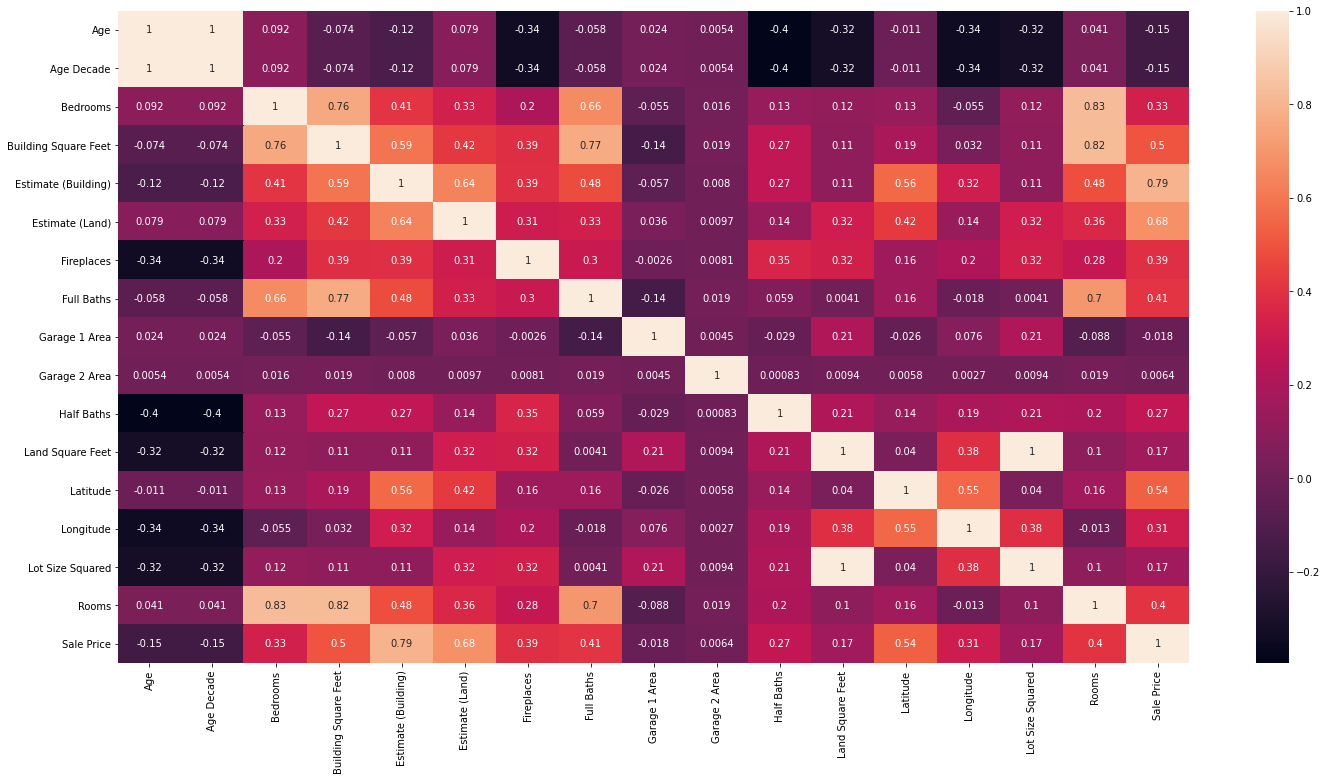

In [10]:
sn.heatmap(corrMatrix, annot=True)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.show()

In [11]:
new_cols = []
for col in cols_of_interest:
    if col not in ["Sale Price", 'Estimate (Building)', 'Estimate (Land)' ]:
        if min(chicago_sales[col]) >= 1:
            chicago_sales["Log of {}".format(col)] = np.log(chicago_sales[col])
            new_cols.append("Log of {}".format(col))
        if min(chicago_sales[col]) >= 0:
            chicago_sales["SQRT of {}".format(col)] = np.sqrt(chicago_sales[col])
            new_cols.append("SQRT of {}".format(col))
        chicago_sales["Square of {}".format(col)] = np.square(chicago_sales[col])
        new_cols.append("Square of {}".format(col))
    
cols_of_interest = cols_of_interest+new_cols
corr_df = chicago_sales[cols_of_interest]
corr_df.describe()

,Age,Age Decade,Bedrooms,Building Square Feet,Estimate (Building),Estimate (Land),Fireplaces,Full Baths,Garage 1 Area,Garage 2 Area,...,Square of Latitude,Log of Longitude,SQRT of Longitude,Square of Longitude,Log of Lot Size Squared,SQRT of Lot Size Squared,Square of Lot Size Squared,Log of Rooms,SQRT of Rooms,Square of Rooms
count,326484.000000,326484.000000,326484.000000,326484.000000,3.264840e+05,3.264840e+05,326484.000000,326484.000000,326484.000000,326484.000000,...,326484.000000,326484.000000,326484.000000,326484.000000,326484.000000,3.264840e+05,3.264840e+05,326484.000000,326484.000000,326484.000000
mean,65.801411,6.580141,3.536982,1802.523012,2.167108e+05,5.026152e+04,0.314873,1.684478,1.584393,0.006435,...,1751.856412,4.474831,9.369090,7705.332540,17.200989,7.005194e+03,4.315993e+20,1.885624,2.608723,61.000101
std,31.748073,3.174807,1.515674,1036.748828,1.954864e+05,5.389067e+04,0.542223,0.913362,0.753563,0.153946,...,14.260266,0.001656,0.007759,25.555954,1.278626,1.278795e+04,1.585534e+23,0.345439,0.510991,148.067625
min,1.000000,0.100000,1.000000,392.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,...,1719.749944,4.471923,9.355473,7660.605333,10.007893,1.490000e+02,4.928844e+08,0.693147,1.414214,4.000000
25%,47.000000,4.700000,3.000000,1129.000000,1.092300e+05,2.646000e+04,0.000000,1.000000,1.000000,0.000000,...,1741.469800,4.473735,9.363955,7688.422087,16.442958,3.720000e+03,1.915013e+14,1.609438,2.236068,25.000000
50%,61.000000,6.100000,3.000000,1470.000000,1.679600e+05,3.720000e+04,0.000000,1.000000,2.000000,0.000000,...,1753.235478,4.474535,9.367699,7700.726078,17.083772,5.125000e+03,6.898831e+14,1.791759,2.449490,36.000000
75%,91.000000,9.100000,4.000000,2172.000000,2.558300e+05,5.464250e+04,1.000000,2.000000,2.000000,0.000000,...,1763.889806,4.475550,9.372453,7716.371827,17.974394,8.000000e+03,4.096000e+15,2.079442,2.828427,64.000000
max,181.000000,18.100000,90.000000,19620.000000,7.497550e+06,3.716680e+06,2.000000,42.000000,2.000000,4.000000,...,1776.957919,4.480327,9.394866,7790.446509,29.815382,2.980767e+06,7.894273e+25,5.484797,15.524175,58081.000000


In [12]:
corrMatrix = corr_df.corr(method="spearman")
corrMatrix

,Age,Age Decade,Bedrooms,Building Square Feet,Estimate (Building),Estimate (Land),Fireplaces,Full Baths,Garage 1 Area,Garage 2 Area,...,Square of Latitude,Log of Longitude,SQRT of Longitude,Square of Longitude,Log of Lot Size Squared,SQRT of Lot Size Squared,Square of Lot Size Squared,Log of Rooms,SQRT of Rooms,Square of Rooms
Age,1.000000,1.000000,0.091725,-0.074351,-0.122140,0.079119,-0.335121,-0.057879,0.023715,0.005408,...,-0.011121,-0.341831,-0.341831,-0.341831,-0.315138,-0.315138,-0.315138,0.040919,0.040919,0.040919
Age Decade,1.000000,1.000000,0.091725,-0.074351,-0.122140,0.079119,-0.335121,-0.057879,0.023715,0.005408,...,-0.011121,-0.341831,-0.341831,-0.341831,-0.315138,-0.315138,-0.315138,0.040919,0.040919,0.040919
Bedrooms,0.091725,0.091725,1.000000,0.757434,0.407349,0.334521,0.202371,0.663440,-0.055336,0.015582,...,0.129267,-0.054761,-0.054761,-0.054761,0.122100,0.122100,0.122100,0.826117,0.826117,0.826117
Building Square Feet,-0.074351,-0.074351,0.757434,1.000000,0.592044,0.417209,0.386825,0.770506,-0.140018,0.019121,...,0.193337,0.032120,0.032120,0.032120,0.111079,0.111079,0.111079,0.824329,0.824329,0.824329
Estimate (Building),-0.122140,-0.122140,0.407349,0.592044,1.000000,0.637078,0.394827,0.480098,-0.057064,0.007977,...,0.559458,0.315419,0.315419,0.315419,0.109805,0.109805,0.109805,0.484338,0.484338,0.484338
Estimate (Land),0.079119,0.079119,0.334521,0.417209,0.637078,1.000000,0.310018,0.329028,0.035840,0.009689,...,0.422588,0.137511,0.137511,0.137511,0.315146,0.315146,0.315146,0.363864,0.363864,0.363864
Fireplaces,-0.335121,-0.335121,0.202371,0.386825,0.394827,0.310018,1.000000,0.295086,-0.002579,0.008110,...,0.160140,0.203897,0.203897,0.203897,0.324932,0.324932,0.324932,0.280887,0.280887,0.280887
Full Baths,-0.057879,-0.057879,0.663440,0.770506,0.480098,0.329028,0.295086,1.000000,-0.144552,0.019035,...,0.157766,-0.017968,-0.017968,-0.017968,0.004076,0.004076,0.004076,0.704443,0.704443,0.704443
Garage 1 Area,0.023715,0.023715,-0.055336,-0.140018,-0.057064,0.035840,-0.002579,-0.144552,1.000000,0.004451,...,-0.025725,0.075890,0.075890,0.075890,0.210111,0.210111,0.210111,-0.087527,-0.087527,-0.087527
Garage 2 Area,0.005408,0.005408,0.015582,0.019121,0.007977,0.009689,0.008110,0.019035,0.004451,1.000000,...,0.005779,0.002702,0.002702,0.002702,0.009371,0.009371,0.009371,0.018936,0.018936,0.018936


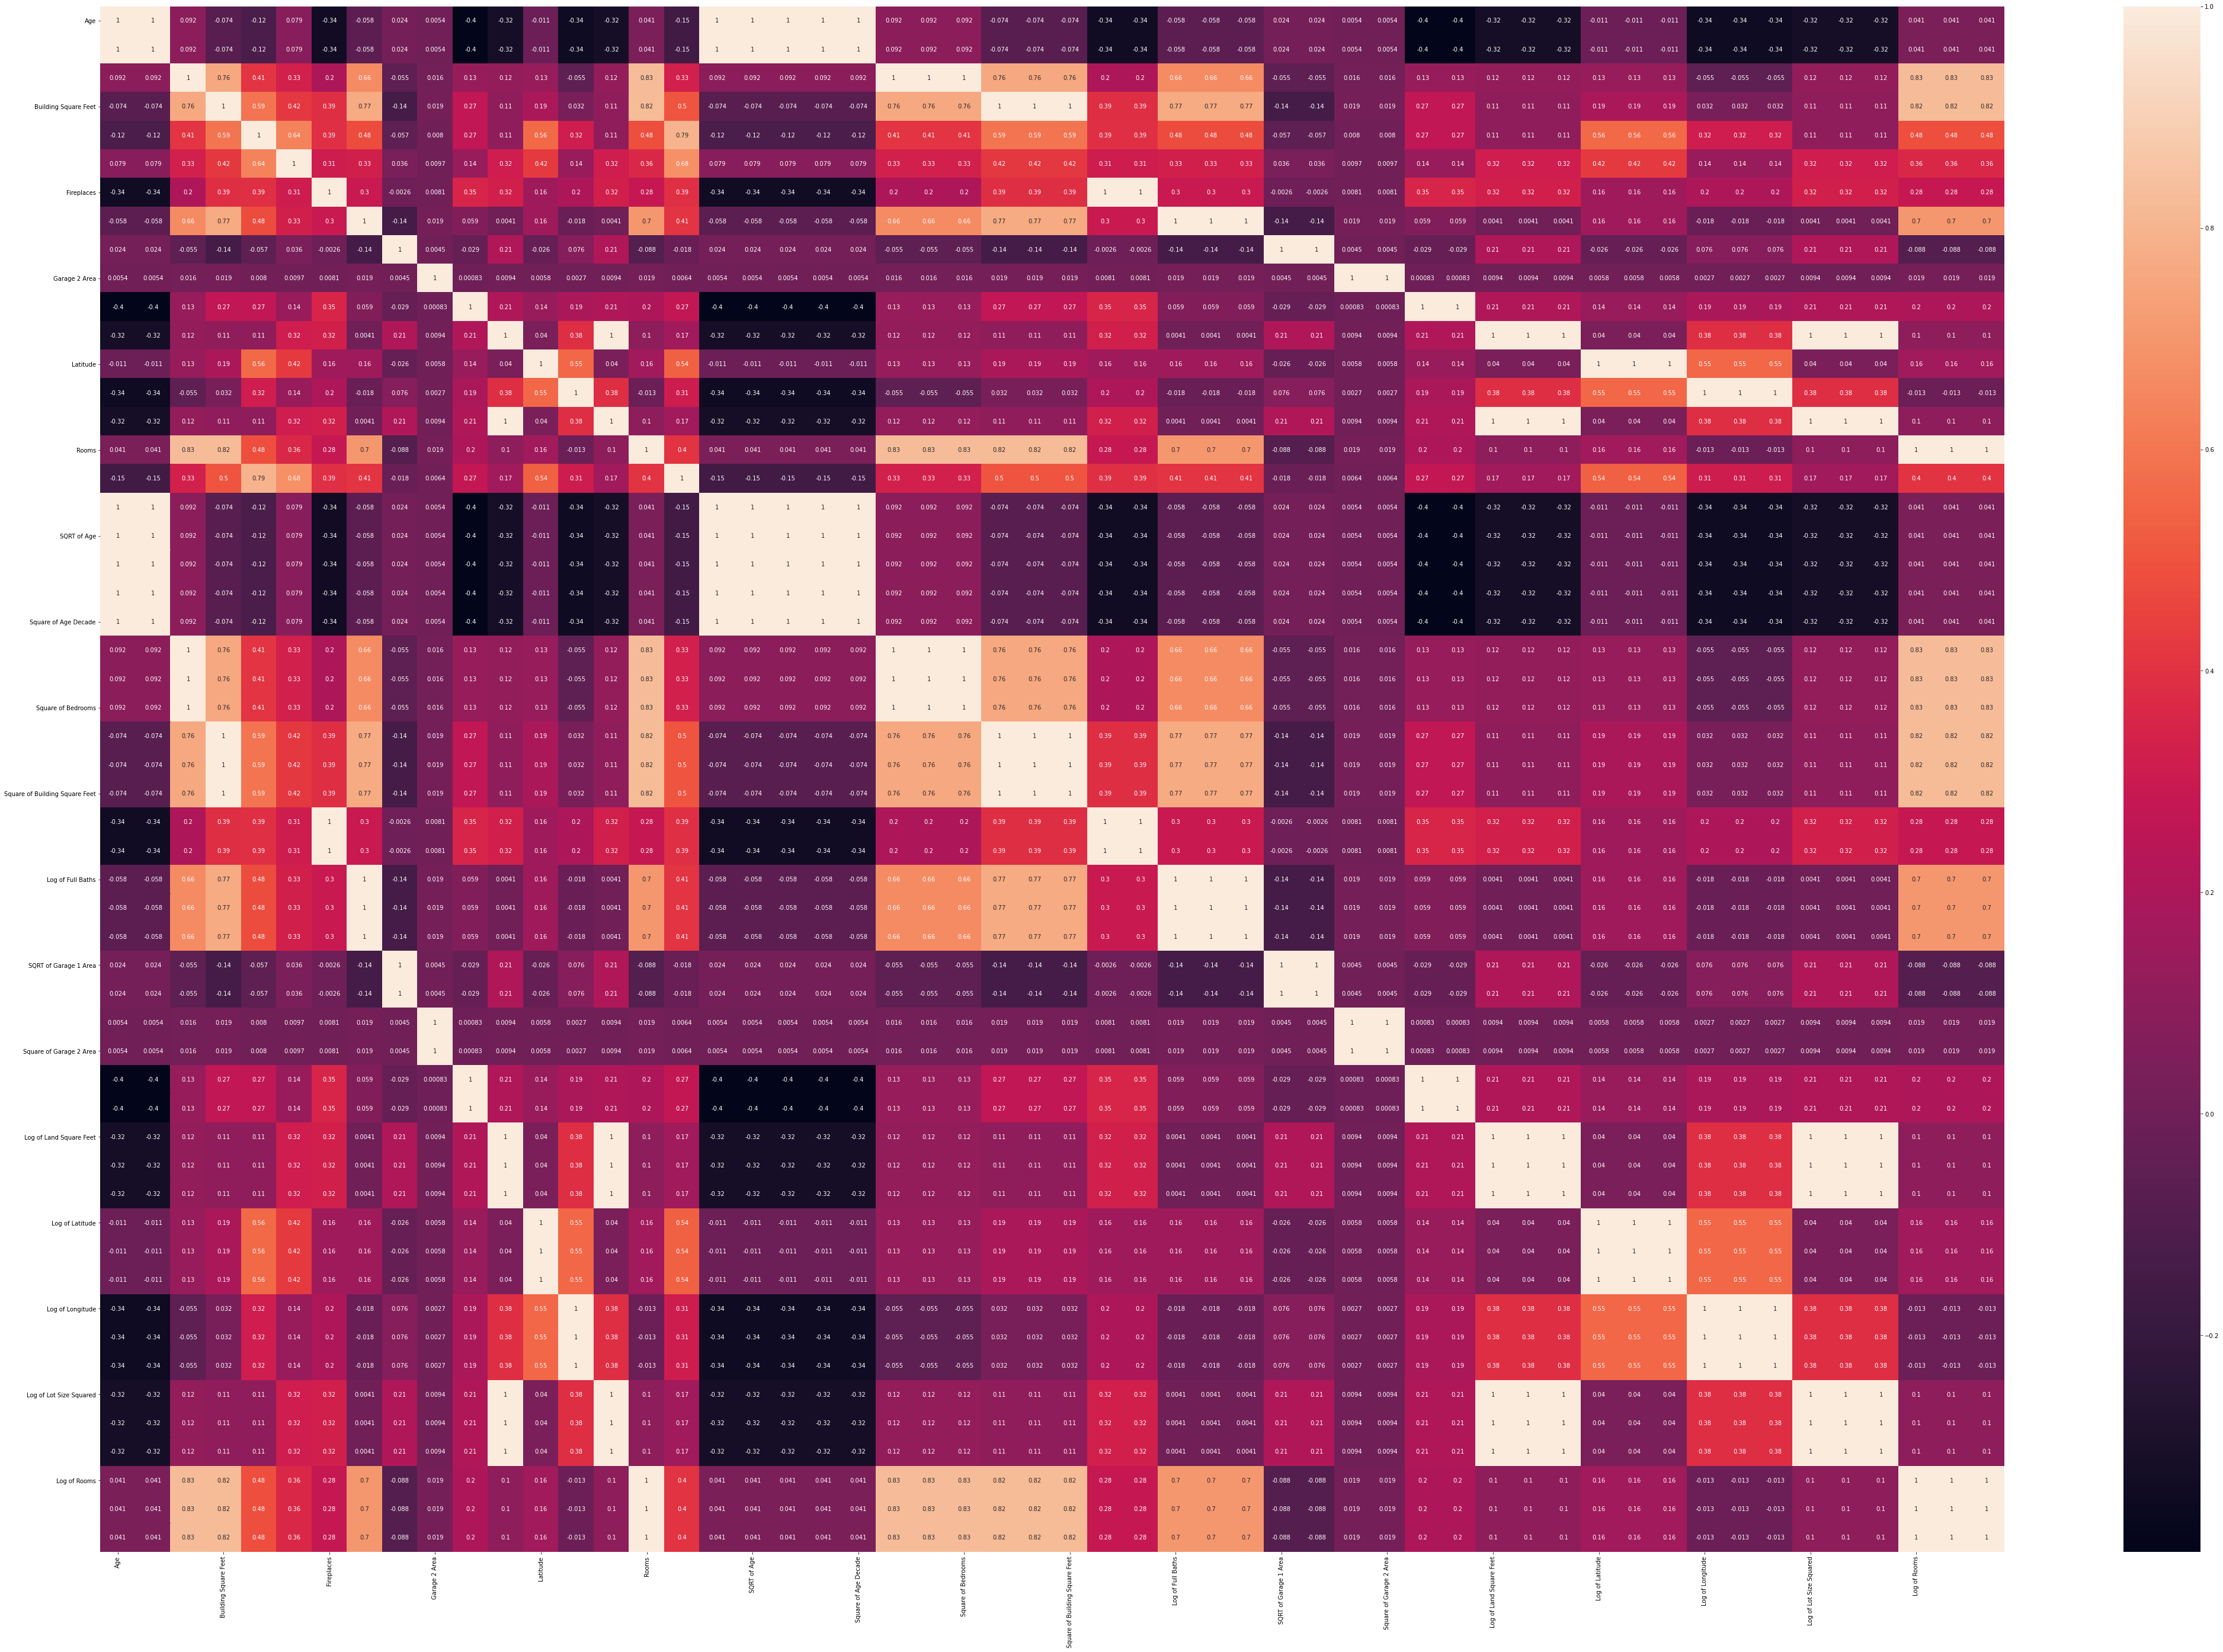

In [13]:
sn.heatmap(corrMatrix, annot=True)
fig = plt.gcf()
fig.set_size_inches(72, 48)
plt.show()

# Data Filtering/Imputing for ML

In [14]:
ml_df = chicago_sales
print("Dataframe has {} rows and {} cols".format(len(ml_df), len(ml_df.columns)))

for col in ml_df.columns:
    if col != "PIN":
        if ml_df[col].dtypes == np.int64:
            #print("int64")
            ml_df[col] = ml_df[col].astype("int32")
        elif ml_df[col].dtypes == np.float64:
            ml_df[col] = ml_df[col].astype("float32")
            #print("float64")
        print("Col: {:35s}, Dtype: {}".format(col, ml_df[col].dtypes))
ml_df.to_pickle("./data/processed/Cleaned_Chicago_Sales.pkl")
ml_df.to_csv("./data/processed/Cleaned_Chicago_Sales.csv")

Dataframe has 326484 rows and 170 cols
Col: Property Class                     , Dtype: int32
Col: Neighborhood Code                  , Dtype: int32
Col: Land Square Feet                   , Dtype: float32
Col: Town Code                          , Dtype: int32
Col: Type of Residence                  , Dtype: float32
Col: Apartments                         , Dtype: float32
Col: Wall Material                      , Dtype: float32
Col: Roof Material                      , Dtype: float32
Col: Rooms                              , Dtype: float32
Col: Bedrooms                           , Dtype: float32
Col: Basement                           , Dtype: float32
Col: Basement Finish                    , Dtype: float32
Col: Central Heating                    , Dtype: float32
Col: Central Air                        , Dtype: float32
Col: Fireplaces                         , Dtype: float32
Col: Attic Type                         , Dtype: float32
Col: Attic Finish                       , Dtype: int32


Col: SQRT of Land Square Feet           , Dtype: float32
Col: Square of Land Square Feet         , Dtype: float32
Col: Log of Latitude                    , Dtype: float32
Col: SQRT of Latitude                   , Dtype: float32
Col: Square of Latitude                 , Dtype: float32
Col: Log of Longitude                   , Dtype: float32
Col: SQRT of Longitude                  , Dtype: float32
Col: Square of Longitude                , Dtype: float32
Col: Log of Lot Size Squared            , Dtype: float32
Col: SQRT of Lot Size Squared           , Dtype: float32
Col: Square of Lot Size Squared         , Dtype: float32
Col: Log of Rooms                       , Dtype: float32
Col: SQRT of Rooms                      , Dtype: float32
Col: Square of Rooms                    , Dtype: float32


In [15]:
for val in ml_df["Property Class"].unique():
    df = ml_df[ml_df["Property Class"] == val]
    print("Property Class {} has {} entries".format(val, len(df)) )
    df.to_pickle("./data/processed/Cleaned_Chicago_Sales_PC{}.pkl".format(int(val)))
    df.to_csv("./data/processed/Cleaned_Chicago_Sales_PC{}.csv".format(int(val)))

Property Class 211 has 46653 entries
Property Class 204 has 13713 entries
Property Class 208 has 3306 entries
Property Class 202 has 35293 entries
Property Class 203 has 102507 entries
Property Class 207 has 9415 entries
Property Class 205 has 21302 entries
Property Class 278 has 27966 entries
Property Class 234 has 27393 entries
Property Class 206 has 8613 entries
Property Class 295 has 22518 entries
Property Class 212 has 2914 entries
Property Class 210 has 3462 entries
Property Class 209 has 1429 entries
